In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# from astropy.visualization import astropy_mpl_style
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
from astropy.table import Table

Reading the files:

In [22]:
obj_file_1 = get_pkg_data_filename('spectra/spec-0637-52174-0259.fits')
obj_file_2 = get_pkg_data_filename('spectra/spec-0607-52368-0581.fits')
obj_file_3 = get_pkg_data_filename('spectra/spec-0976-52413-0574.fits')

Checking their headers:

In [25]:
fits.info(obj_file_1)

Filename: spectra/spec-0637-52174-0259.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     141   ()      
  1  COADD         1 BinTableHDU     26   3823R x 8C   [E, E, E, J, J, E, E, E]   
  2  SPECOBJ       1 BinTableHDU    262   1R x 126C   [6A, 4A, 16A, 23A, 16A, 8A, E, E, E, J, E, E, J, B, B, B, B, B, B, J, 22A, 19A, 19A, 22A, 19A, I, 3A, 3A, 1A, J, D, D, D, E, E, 19A, 8A, J, J, J, J, K, K, J, J, J, J, J, J, K, K, K, K, I, J, J, J, J, 5J, D, D, 6A, 21A, E, E, E, J, E, 24A, 10J, J, 10E, E, E, E, E, E, E, J, E, E, E, J, E, 5E, E, 10E, 10E, 10E, 5E, 5E, 5E, 5E, 5E, J, J, E, E, E, E, E, E, 25A, 21A, 10A, E, E, E, E, E, E, E, E, J, E, E, J, 1A, 1A, E, E, J, J, 1A, 5E, 5E]   
  3  SPZLINE       1 BinTableHDU     48   29R x 19C   [J, J, J, 13A, D, E, E, E, E, E, E, E, E, E, E, J, J, E, E]   


In [26]:
fits.info(obj_file_2)

Filename: spectra/spec-0607-52368-0581.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     143   ()      
  1  COADD         1 BinTableHDU     26   3829R x 8C   [E, E, E, J, J, E, E, E]   
  2  SPECOBJ       1 BinTableHDU    262   1R x 126C   [6A, 4A, 16A, 23A, 16A, 8A, E, E, E, J, E, E, J, B, B, B, B, B, B, J, 22A, 19A, 19A, 22A, 19A, I, 3A, 3A, 1A, J, D, D, D, E, E, 19A, 8A, J, J, J, J, K, K, J, J, J, J, J, J, K, K, K, K, I, J, J, J, J, 5J, D, D, 6A, 21A, E, E, E, J, E, 24A, 10J, J, 10E, E, E, E, E, E, E, J, E, E, E, J, E, 5E, E, 10E, 10E, 10E, 5E, 5E, 5E, 5E, 5E, J, J, E, E, E, E, E, E, 25A, 21A, 10A, E, E, E, E, E, E, E, E, J, E, E, J, 1A, 1A, E, E, J, J, 1A, 5E, 5E]   
  3  SPZLINE       1 BinTableHDU     48   29R x 19C   [J, J, J, 13A, D, E, E, E, E, E, E, E, E, E, E, J, J, E, E]   


In [27]:
fits.info(obj_file_3)

Filename: spectra/spec-0976-52413-0574.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     141   ()      
  1  COADD         1 BinTableHDU     26   3832R x 8C   [E, E, E, J, J, E, E, E]   
  2  SPECOBJ       1 BinTableHDU    262   1R x 126C   [6A, 4A, 16A, 23A, 16A, 8A, E, E, E, J, E, E, J, B, B, B, B, B, B, J, 22A, 19A, 19A, 22A, 19A, I, 3A, 3A, 1A, J, D, D, D, E, E, 19A, 8A, J, J, J, J, K, K, J, J, J, J, J, J, K, K, K, K, I, J, J, J, J, 5J, D, D, 6A, 21A, E, E, E, J, E, 24A, 10J, J, 10E, E, E, E, E, E, E, J, E, E, E, J, E, 5E, E, 10E, 10E, 10E, 5E, 5E, 5E, 5E, 5E, J, J, E, E, E, E, E, E, 25A, 21A, 10A, E, E, E, E, E, E, E, E, J, E, E, J, 1A, 1A, E, E, J, J, 1A, 5E, 5E]   
  3  SPZLINE       1 BinTableHDU     48   29R x 19C   [J, J, J, 13A, D, E, E, E, E, E, E, E, E, E, E, J, J, E, E]   


Opening the files:

In [28]:
obj_1 = fits.open(obj_file_1, memmap=True)
obj_2 = fits.open(obj_file_2, memmap=True)
obj_3 = fits.open(obj_file_3, memmap=True)

Checking their columns:

In [29]:
print(obj_1[1].columns)

ColDefs(
    name = 'flux'; format = 'E'
    name = 'loglam'; format = 'E'
    name = 'ivar'; format = 'E'
    name = 'and_mask'; format = 'J'
    name = 'or_mask'; format = 'J'
    name = 'wdisp'; format = 'E'
    name = 'sky'; format = 'E'
    name = 'model'; format = 'E'
)


In [32]:
print(obj_2[1].columns)

ColDefs(
    name = 'flux'; format = 'E'
    name = 'loglam'; format = 'E'
    name = 'ivar'; format = 'E'
    name = 'and_mask'; format = 'J'
    name = 'or_mask'; format = 'J'
    name = 'wdisp'; format = 'E'
    name = 'sky'; format = 'E'
    name = 'model'; format = 'E'
)


In [33]:
print(obj_3[1].columns)

ColDefs(
    name = 'flux'; format = 'E'
    name = 'loglam'; format = 'E'
    name = 'ivar'; format = 'E'
    name = 'and_mask'; format = 'J'
    name = 'or_mask'; format = 'J'
    name = 'wdisp'; format = 'E'
    name = 'sky'; format = 'E'
    name = 'model'; format = 'E'
)


The three of them have the same columns.

---

Now, extracting the tables:

In [37]:
obj_1_data = Table(obj_1[1].data)
obj_2_data = Table(obj_2[1].data)
obj_3_data = Table(obj_3[1].data)

Examining one of the tables:

In [38]:
obj_1_data

flux,loglam,ivar,and_mask,or_mask,wdisp,sky,model
float32,float32,float32,int32,int32,float32,float32,float32
456.46783,3.5809,0.0076833623,0,0,1.208117,12.749289,452.66412
448.16495,3.581,0.007635992,0,0,1.2079476,12.617554,454.69885
465.36246,3.5811,0.007406635,0,0,1.2077763,12.558832,452.83044
454.33633,3.5812,0.007554809,0,0,1.2075934,12.567171,450.56207
463.41162,3.5813,0.0075415056,0,0,1.2074188,12.677018,447.66266
451.1972,3.5814,0.007617637,0,0,1.2072449,12.838299,440.47394
470.83276,3.5815,0.007435983,0,0,1.2070667,12.971545,434.99786
465.46625,3.5816,0.0074932976,0,0,1.2068965,13.214445,436.82858
454.72626,3.5817,0.0076761805,0,0,1.2067214,13.427512,441.2128


In [39]:
type(obj_1_data)

astropy.table.table.Table

The columns needed for the plot are `flux` and `loglam`, the flux and wavelength.

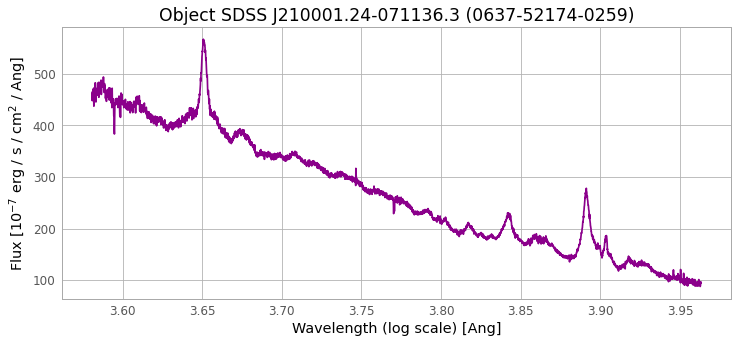

In [76]:
plt.figure(figsize=(12, 5))
plt.plot(obj_1_data['loglam'], obj_1_data['flux'], c='darkmagenta')

plt.xlabel(r'Wavelength (log scale) [Ang]')
plt.ylabel(r'Flux [$10^{-7}$ erg / s / cm$^2$ / Ang]')

plt.title('Object SDSS J210001.24-071136.3 (0637-52174-0259)')

# plt.savefig('spectra_plots/spectra_obj_1.pdf')

plt.show()

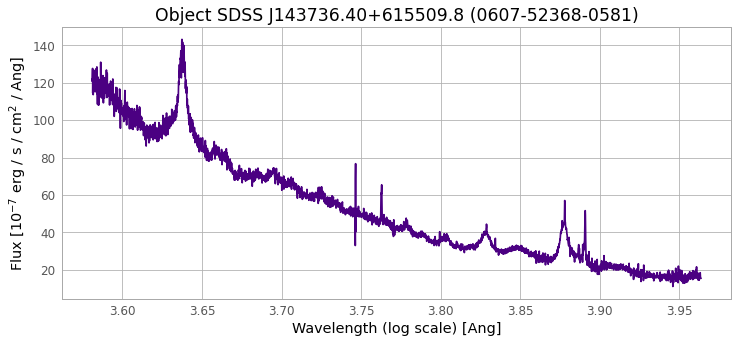

In [77]:
plt.figure(figsize=(12, 5))
plt.plot(obj_2_data['loglam'], obj_2_data['flux'], c='indigo')

plt.xlabel(r'Wavelength (log scale) [Ang]')
plt.ylabel(r'Flux [$10^{-7}$ erg / s / cm$^2$ / Ang]')

plt.title('Object SDSS J143736.40+615509.8 (0607-52368-0581)')

# plt.savefig('spectra_plots/spectra_obj_2.pdf')

plt.show()

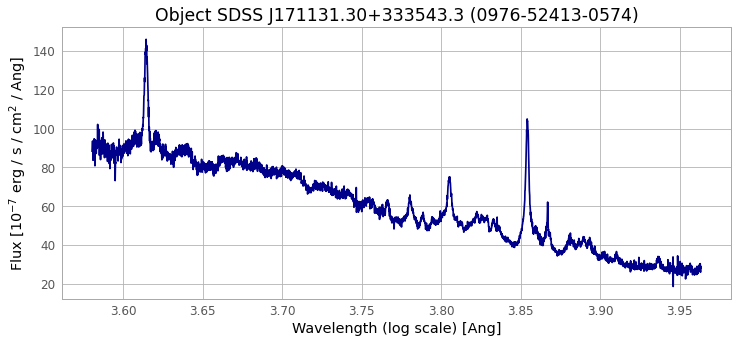

In [78]:
plt.figure(figsize=(12, 5))
plt.plot(obj_3_data['loglam'], obj_3_data['flux'], c='darkblue')

plt.xlabel(r'Wavelength (log scale) [Ang]')
plt.ylabel(r'Flux [$10^{-7}$ erg / s / cm$^2$ / Ang]')

plt.title('Object SDSS J171131.30+333543.3 (0976-52413-0574)')

# plt.savefig('spectra_plots/spectra_obj_3.pdf')

plt.show()